**базовые модели ML**

Евгений Борисов <esborisov@sevsu.ru>

----

In [1]:
# # показывать выдачу всех строк ячейки
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import gzip
# import pickle

import numpy as np
import numpy.random as rng
# import pandas as pd
# import gc
from tqdm import tqdm

# from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [3]:
# tqdm.pandas ()
# pd.options.display.float_format = '{:,.2f}'.format

---

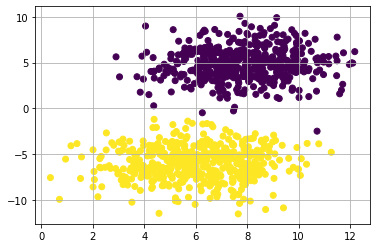

In [4]:
from sklearn.datasets import make_blobs

# X,y = make_blobs( n_samples=1000, centers=3, cluster_std=[1.0, 0.9, 0.8] )
X,y = make_blobs( n_samples=1000, centers=2, cluster_std=[1.7,1.8] )
X.shape,y.shape

plt.scatter(X[:,0],X[:,1],c=y)
plt.grid()

## FactorLRA

In [5]:
from lib.optimizer.lrate import ConstLRA
lr =  ConstLRA(.1)
[ lr.next() for _ in range(100) ]
lr.history

[0.1]

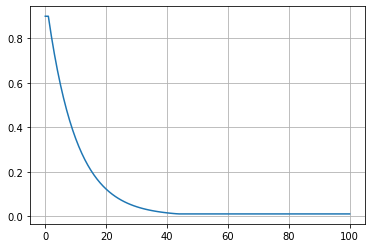

In [6]:
from lib.optimizer.lrate import FactorLRA
lr =  FactorLRA(value=.9,bound=.01,factor=.9,)
v = [ lr.next() for _ in range(100)] 
plt.plot(lr.history)
plt.grid()

## LogisticRegression + BCE + SGD

In [7]:
from lib.estimator import  ClassifierEstimator

100%|██████████| 10/10 [00:00<00:00, 163.66it/s, loss=0.0052, lr=0.1]


Threshold value is:0.8753351635092408

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



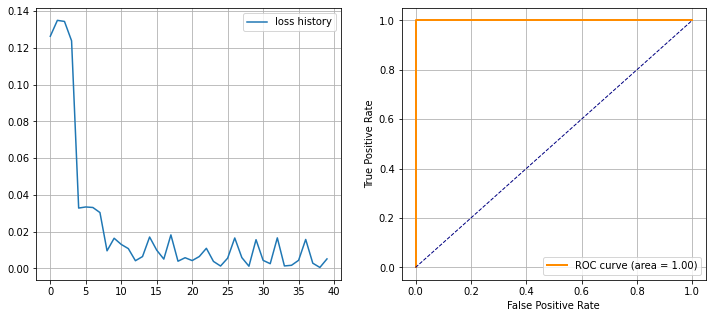

In [8]:
from lib.model.linear import LogisticRegression
from lib.loss.crossentropy import BCE
from lib.optimizer.gd import SGD

y_ = y[:,np.newaxis]

model = LogisticRegression(n_features=X.shape[1] )
lra=ConstLRA(.1)
lsh,lrh = SGD(BCE(model),lra=lra).fit([X,y_],n_epoch=10,batch_size=X.shape[0]//3)
p = model.predict(X)

ClassifierEstimator( target=y, predict_score=p, loss_history=lsh, ).estimate()

## LinearModel  + MSQE + GD

100%|██████████| 15/15 [00:00<00:00, 1714.34it/s, loss=0.0818, lr=0.01]

(1000, 2)
Threshold value is:0.4413727972500132

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       500
           1       0.99      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



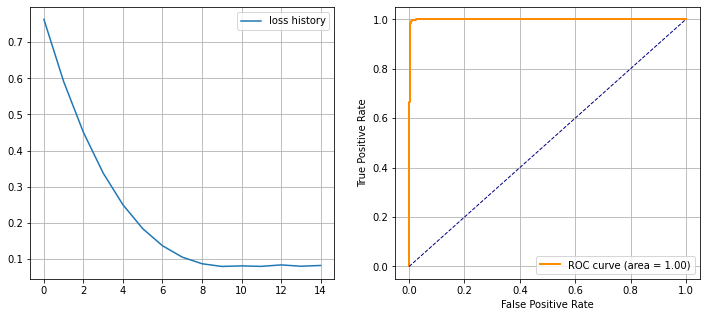

In [9]:
from lib.model.linear import LinearModel
from lib.optimizer.gd import GD
from lib.loss.msqe import MSQE

%xdel model 

y_ = np.eye(y.max()+1)[y]
print(y_.shape)

model = LinearModel(n_features=X.shape[1],n_out=y_.shape[1] )

lsh,lrh = GD(MSQE(model),lra=ConstLRA(.01)).fit([X,y_],n_epoch=15)
p = model.predict(X)[:,1]

ClassifierEstimator( target=y, predict_score=p,  loss_history=lsh, ).estimate()

In [10]:
from lib.optimizer.gd import EarlyStopping
# EarlyStopping(min_delta,patience)
# es=EarlyStopping(min_delta=1e-3,patience=3)

## Softmax  + CCE + SGD

100%|██████████| 10/10 [00:00<00:00, 174.45it/s, loss=-8.07, lr=0.1]

(1000, 2)
Threshold value is:0.000276441878838435

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       500
           1       0.99      1.00      0.99       500

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



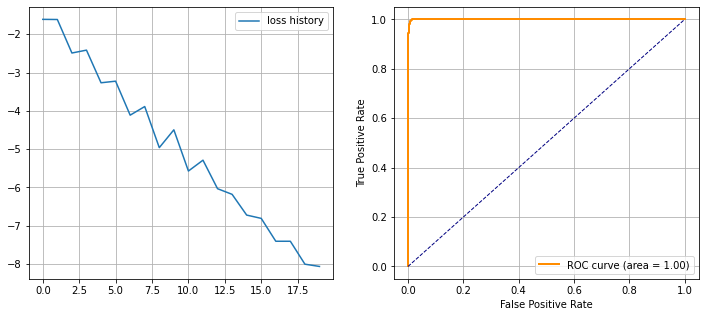

In [11]:
from lib.model.linear import Softmax
from lib.optimizer.gd import SGD
from lib.loss.crossentropy import CCE

%xdel model 

y_ = np.eye(y.max()+1)[y]
print(y_.shape)

model = Softmax(n_features=X.shape[1],n_out=y_.shape[1] )

lsh,lrh = SGD(CCE(model),lra=ConstLRA(.1)).fit([X,y_],n_epoch=10,batch_size=X.shape[0]//2)
p = model.predict(X)[:,0]

ClassifierEstimator( target=y, predict_score=p,  loss_history=lsh, ).estimate()